In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.activations import sigmoid,softmax,relu
from tensorflow.keras.layers import Dense,Dropout

In [3]:
train=pd.read_csv("mnist_train.csv")

In [4]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test=pd.read_csv("mnist_test.csv")

In [6]:
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.isnull().sum().sum()

0

In [8]:
x_train=train.drop(['label'],axis=1).values
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
x_train=x_train.astype('float32')/255

In [10]:
y_train=train['label'].values
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [11]:
model=Sequential()
model.add(Dense(128,input_shape=(784,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [12]:
history=model.fit(x_train,y_train,epochs=11,batch_size=32,validation_split=0.2)

Epoch 1/11
1500/1500 [==============================] - 5s 2ms/step - loss: 0.3122 - accuracy: 0.9070 - val_loss: 0.1515 - val_accuracy: 0.9552
Epoch 2/11
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1407 - accuracy: 0.9594 - val_loss: 0.1142 - val_accuracy: 0.9667
Epoch 3/11
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0994 - accuracy: 0.9701 - val_loss: 0.1031 - val_accuracy: 0.9693
Epoch 4/11
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0761 - accuracy: 0.9769 - val_loss: 0.0995 - val_accuracy: 0.9726
Epoch 5/11
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0616 - accuracy: 0.9811 - val_loss: 0.0996 - val_accuracy: 0.9717
Epoch 6/11
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0534 - accuracy: 0.9835 - val_loss: 0.1008 - val_accuracy: 0.9726
Epoch 7/11
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0435 - accuracy: 0.9859 - val_loss: 0.1096 - val_accuracy:

In [13]:
x_test=test.drop(['label'],axis=1).values
y_test=test['label'].values

In [14]:
x_test=x_test.astype('float32')/255

In [15]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 740us/step - loss: 0.0892 - accuracy: 0.9763


In [16]:
r = model.fit(x_train, y_train, validation_split= 0.2, batch_size = 128, epochs = 11)

Epoch 1/11
375/375 [==============================] - 1s 2ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 0.1023 - val_accuracy: 0.9792
Epoch 2/11
375/375 [==============================] - 1s 2ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.1027 - val_accuracy: 0.9796
Epoch 3/11
375/375 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.1038 - val_accuracy: 0.9797
Epoch 4/11
375/375 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.1084 - val_accuracy: 0.9796
Epoch 5/11
375/375 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.1110 - val_accuracy: 0.9791
Epoch 6/11
375/375 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.1191 - val_accuracy: 0.9799
Epoch 7/11
375/375 [==============================] - 1s 3ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.1157 - val_accuracy: 0.9800
Epoch 

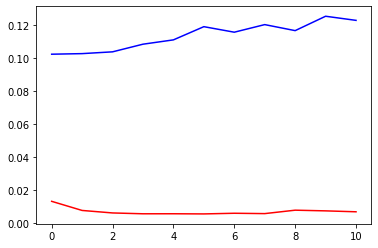

In [17]:
plt.plot(r.history['loss'],label='loss',color='red')
plt.plot(r.history['val_loss'],label='val_loss',color='blue')
plt.show()

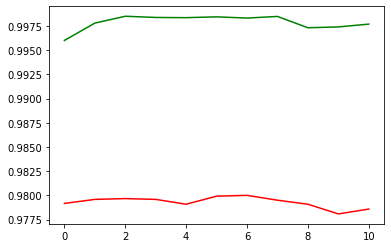

In [18]:
plt.plot(r.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy', color = 'red')
plt.show()

In [20]:
pred=model.predict(x_test)

313/313 [==============================] - 0s 691us/step


In [23]:
x_test=x_test.reshape((10000,28,28))

9


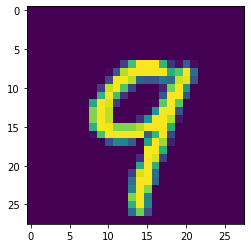

In [24]:
plt.imshow(x_test[12])
print(pred.argmax(axis=1)[12])